In [39]:
# Data to use
# https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/sst/
# https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/chlor_a/

import urllib.request
import requests
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
import glob
import pickle
from bs4 import BeautifulSoup
import webbrowser 

1

# OBTAIN A LIST OF LINKS TO THE YEARLY DATA FROM WEBSITE
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
exit=False
print("Select a parameter; CHLA (chlorophyll a) or SST(surface temperature)\n")
while not exit:
    Userparameter = input() #---------------{IPUT PARAMETER, 'CHLA' for for chlorophyll a, 'SST' for surface temperature} 
    if Userparameter.upper()=='CHLA':
        link1= "https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/chlor_a/"
        exit=True
    elif Userparameter.upper()=='SST':
        link1= "https://oceandata.sci.gsfc.nasa.gov/MODIS-Aqua/Mapped/Daily/4km/sst/"
        exit=True
    else:
        print("Give a valid inpout; CHLA (chlorophyll a) or SST(surface temperature)\n")
    
    

page=requests.get(link1)
soup = BeautifulSoup(page.text, 'html.parser')

listofitems1 = soup.find(class_='column').find_all('a')[7:]

Yearlinks=[]


for item in listofitems1:
    stringchars=[]
    second_symbol=False 
    first_symbol=False
    link = str(item)
    while not second_symbol:
        for letter in link:
            if (letter=='"') and not first_symbol:          
                first_symbol=True
            elif (letter=='"'):
                second_symbol=True
                break
            if (letter!= '"') and first_symbol:
                stringchars.append(letter)      
    s=''.join(stringchars)
    Yearlinks.append(s)


#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
    

# USER INPUT TO SELECT YEAR
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
print("Input the year you would like to retrieve the data for. Year must be between 2002-2020.")
Useryear=input() #--------{SELECT YEAR} 
prefix='https://oceandata.sci.gsfc.nasa.gov'

for link in Yearlinks:
    Year=list(str(Useryear))
    for char in link:
        if char==Year[0]:         
            Year.pop(0)
        if len(Year)==0:
            yearfound=link
            break
    if len(Year)==0:
        break
yearfound=prefix+yearfound


#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 
 


# OBTAIN A LIST OF LINKS TO THE DAILY DATA FROM WEBSITE AND DOWNLOAD REQUIRED DAILY DATA
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 

page=requests.get(yearfound)
soup = BeautifulSoup(page.text, 'html.parser')
listofitems2 = soup.find(class_='column').find_all('a')[8:]
Dailylinks=[]; Daydata=[]
for datalink in listofitems2:
     Dailylinks.append(str(datalink))


def daily_data_chla(Dailylinks):
        
    

    Userdate=input() #-------------{INPUT DAY BETWEEN "001" and "365"}

    c1=0;c2=0;selectionmade=False; Daydata=[]

    #Select singe day here or a range of days
    while not selectionmade:
        if len(Userdate)>3:       
            while c1!=3 or c2!=3:
                c1=0;c2=0; n1=[];n2=[]

                if len(Userdate)<4:#------{checks if user changed input within while}
                    break
                if ("-" in Userdate) and Userdate[len(Userdate)-1]!="-":
                    for index in range(0,Userdate.index("-")):
                        if str(Userdate[index]).isdigit():
                            c1+=1
                            n1.append(Userdate[index])
                    for index in range(Userdate.index("-")+1,len(Userdate)):
                        if str(Userdate[index]).isdigit():
                            c2+=1
                            n2.append(Userdate[index])
                    if (c1!=3) or (c2!=3):
                        print('Give a valid format range separated by "-" or select a single day:\n')
                        Userdate=input()
                    else:
                        n1=int(''.join(n1))
                        n2=int(''.join(n2))
                        selectionmade=True; c3=0 
                        for i in range(0,len(Dailylinks)):
                            if int(Dailylinks[c3][61:64])>=(n1) and int(Dailylinks[c3][61:64])<=(n2):
                                Daydata.append(Dailylinks[c3][9:91])  
                            c3+=1
                        print('Daily data found for the following dates:\n', Daydata)

                else:
                    print('Give a valid format range separated by "-" or select a single day:\n')
                Userdate=input()

        if len(Userdate)==3 and Userdate.isdigit():
            dayfound=False
            while not dayfound:
                c1=0
                if len(Userdate)>3:#-----{check if user changed input within while}
                    break
                for i in range(0,len(Dailylinks)):
                    if Dailylinks[c1][61:64]==Userdate:
                        dayfound=True
                        print(f"Recorded daily data found for the day {Userdate}")
                        break
                    c1+=1
                else:
                    print(f'''There are no data recorded for the given day {Userdate}. Select another day from "000"-"365"
        or give a valid range separated by "-": ''')
                    Userdate=input()
            else:
                Daydata.append(Dailylinks[c1][9:91])
                selectionmade=True

        if len(Userdate)==3 and (not Userdate.isdigit()):
            print('Give a valid format range separated by "-" or select a single day:\n')
            Userdate=input()

        if len(Userdate)<3 :
            selectionmade=False
            print('Give a valid format range separated by "-" or select a single day:\n')
            Userdate=input()
    return Daydata
        
    
    
# DOWNLOAD LINKS OF DAILY DATA FOUND
#""""""""""""""""""""""""""""""""""""""""""#
if Userparameter.upper()=="CHLA":
    print('''Input the day of the year you would like to retrieve the data for. 
        Day must be between '000'and'365'.
        For a range of dates input as '000-365".\n''')
    Daydata=daily_data_chla(Dailylinks)
elif Userparameter.upper()=="SST":
    print("Temperature data for the whole year will be downloaded.")

    

#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""# 



Select a parameter; CHLA (chlorophyll a) or SST(surface temperature)



 SST


Input the year you would like to retrieve the data for. Year must be between 2002-2020.


 2004


Temperature data for the whole year will be downloaded.


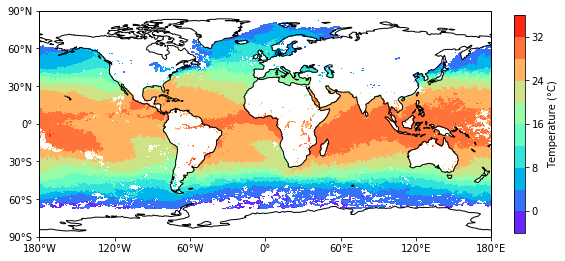

284.6799499988556


In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import netCDF4
import time 

t0 = time.time()



file=r"/Users/constantinosconstantinou/Desktop/TERRA_MODIS.20190101_20190108.L3m.8D.NSST.sst.4km.nc"
d=netCDF4.Dataset(file)

lon=d.variables['lon'][:]
lat=d.variables['lat'][:]
temp=d.variables['sst'][:]
 

fig=plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,temp,10,cmap='rainbow',transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()


ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
lon_formatter = LongitudeFormatter(dateline_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter) 
plt.colorbar(im, orientation='vertical', pad=0.04, shrink=0.8, label='Temperature (\xb0C)')
 
 
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
 
 



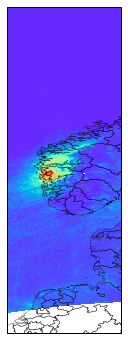

In [30]:
#                        2ND PICTURE (part of map e.g country)
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

file=r"C:\Users\con74781\Desktop\S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953.nc"
d=netCDF4.Dataset(file)

lon=d["PRODUCT"].variables['longitude'][0,:]
lat=d["PRODUCT"].variables['latitude'][0,:]
NO2= d["PRODUCT"].variables['nitrogendioxide_tropospheric_column'][0,:]


fig2 = plt.figure(figsize=(7,6))
ax2 = plt.axes(projection=ccrs.PlateCarree())
x0=3; y0=50.8
x1=10; y1=70.8
ax2.set_extent([x0,x1,y0,y1], crs=ccrs.PlateCarree())

states = NaturalEarthFeature(category="cultural", scale="10m",facecolor="none",
                             name="admin_1_states_provinces_shp")
im2=ax2.contourf(lon,lat,NO2,60,cmap='rainbow')
ax2.add_feature(states, linewidth=0.3, edgecolor="black")
#ax2.coastlines('10m', linewidth=0.8)




plt.show(fig2)


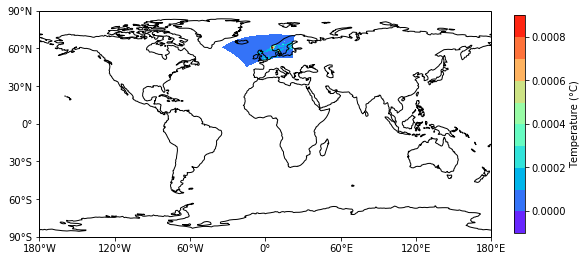

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import netCDF4





file=r"C:\Users\con74781\Desktop\S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953.nc"
d=netCDF4.Dataset(file)

lon=d["PRODUCT"].variables['longitude'][0,:]
lat=d["PRODUCT"].variables['latitude'][0,:]
NO2= d["PRODUCT"].variables['nitrogendioxide_tropospheric_column'][0,:]


fig=plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree(0))
im=ax.contourf(lon,lat,NO2,10,cmap='rainbow',transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()


ax.set_xticks([-180, -120, -60, 0, 60, 120, 180])
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
lon_formatter = LongitudeFormatter(dateline_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter) 
plt.colorbar(im, orientation='vertical', pad=0.04, shrink=0.8, label='Temperature (\xb0C)')

In [5]:
d


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2020-03-25 13:23:05 f_s5pops tropnll2dp /mnt/data1/storage_nrt/cache_nrt/WORKING-618725131/JobOrder.618723958.xml
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: c11569d5-7b5a-4752-a827-d14e2bbb7c34
    id: S5P_NRTI_L2__NO2____20200325T123850_20200325T124350_12685_01_010302_20200325T131953
    time_reference: 2020-03-25T00:00:00Z
    time_reference_days_since_1950: 25651
    time_reference_julian_day: 2458933.5
    time_reference_seconds_since_1970: 1585094400
    time_coverage_start: 2020-03-25T12:38:45Z
    time_coverage_end: 2020-03-25T12:43:56Z
    time_coverage_duration: PT311.633S
    time_coverage_resolution: PT0.840S
    orbit: 12685
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.3.2
    keywor

In [67]:
d["PRODUCT"].variables['delta_time'][0,:5]


masked_array(data=[45525170, 45526010, 45526850, 45527690, 45528530],
             mask=False,
       fill_value=999999)

C:\Users\con74781\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


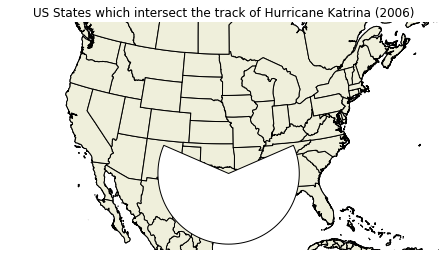

In [36]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader





def main():
    fig = plt.figure()
    
    ax=fig.add_subplot(2,1,1,projection=ccrs.LambertConformal())
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes'
    states_shp = shpreader.natural_earth(resolution='10m',
                                         category='cultural', name=shapename)

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(), styler=colorize_state)

    
#======================================================================

    ax=fig.add_subplot(2,1,2,projection=ccrs.LambertConformal())
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-126, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces'
    states_shp = shpreader.natural_earth(resolution='10m',
                                         category='cultural', name=shapename)

    # to get the effect of having just the states without a map "background"
    # turn off the outline and background patches
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2006)')

    

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(), styler=colorize_state)

    
    
    
#================================================================================================    
    
    
   

    # make two proxy artists to add to a legend
#     direct_hit = mpatches.Rectangle((0, 0), 0.05, 0.05, facecolor="red")
#     within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
#     labels = ['State directly intersects\nwith track',
#               'State is within \n2 degrees of track']
#     ax.legend([direct_hit, within_2_deg], labels,
#               loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()

KeyboardInterrupt: 

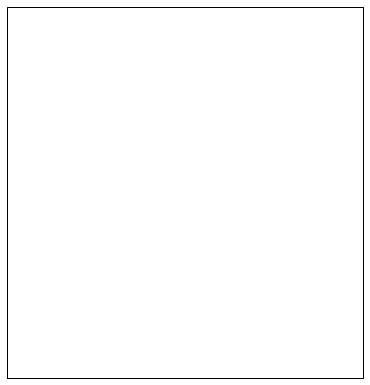

In [151]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)

    return {'facecolor': facecolor, 'edgecolor': 'black'}


#1ST figure on the right
#=========================
fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,1,1,projection=ccrs.Mollweide())
ax.set_extent([-12, 3, 49, 61], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp1 = shpreader.natural_earth(resolution='10m',category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp1).geometries(),ccrs.PlateCarree(), styler=colorize_state)


#Legend of 1st figure on the right
#==================================
direct_hit = mpatches.Rectangle((0, 0), 0.05, 0.05, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = ['State directly intersects\nwith track','State is within \n2 degrees of track']
ax.legend([direct_hit, within_2_deg], labels,loc='lower left', bbox_to_anchor=(0,0), fancybox=True)


#2nd figure on the left
#==================================

ax=fig.add_subplot(2,1,2,projection=ccrs.Mollweide())
ax.set_extent([-10, 3, 49, 60], ccrs.Geodetic())
shapename = 'admin_1_states_provinces'
states_shp2 = shpreader.natural_earth(resolution='10m',category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp2).geometries(),ccrs.PlateCarree(), styler=colorize_state)



#Legend of 2nd figure on the right
#==================================
direct_hit = mpatches.Rectangle((0, 0), 2, 2, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 2, 2, facecolor="#FF7E00")
labels = ['State directly intersects\nwith track','State is within \n2 degrees of track']
ax.legend([direct_hit, within_2_deg], labels,loc='lower left', bbox_to_anchor=(0,0), fancybox=True)




plt.show()


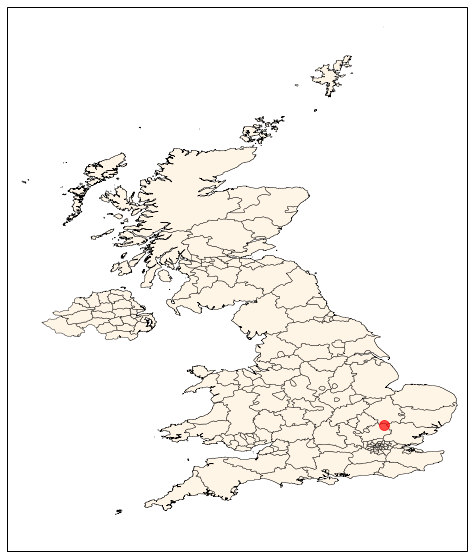

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature


data=Reader(r"C:\Users\con74781\Desktop\Digital Projects\Python corona virus project\UK map with districts\GBR_adm2.shp")
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-9, 2, 49, 62])
ax.add_geometries(data.geometries(), ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.960784,0.901960))
ax.plot(0, 52, marker='o', color='red', markersize=10,
            alpha=0.7)


plt.show()




In [125]:
import shapely.geometry as sgeom
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature

#obtain list of geometries


geom=[]
reader = Reader(r"C:\Users\con74781\Desktop\New folder\GBR_adm2.shp")
boroughs = reader.records()

for i in boroughs:
    geom.append(next(boroughs).geometry)




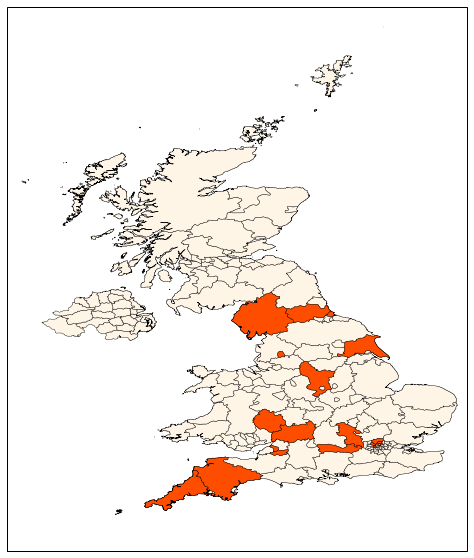

In [145]:
#plot different colors boroughs

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-9, 2, 49, 62])
ax.add_geometries(data.geometries() ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.960784,0.901960))
ax.add_geometries(geom[:20] ,ccrs.PlateCarree(),edgecolor='k',linewidth=0.4,facecolor=(1,0.3,0))

plt.show()


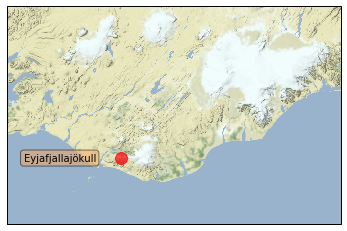

In [154]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


def main():
    # Create a Stamen terrain background instance.
    stamen_terrain = cimgt.Stamen('terrain-background')

    fig = plt.figure()

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    ax.text(-19.613333, 63.62, u'Eyjafjallajökull',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()


if __name__ == '__main__':
    main()